### Imports

In [1]:
import pandas as pd

### Load Data From CSV

In [2]:
df = pd.read_csv('data/filtered_flood_data_03-09-2025.csv')
df.head()

,Unnamed: 0,flood_area_code,ea_area_name,is_tidal,severity,severity_level,time_raised,time_severity_changed,county,river_or_sea,latitude,longitude,time_recorded
0,0,061WAF02Churn,Thames,0,Warning no longer in force,4,2025-02-09 08:52:12,2025-02-09 08:52:00,"Gloucestershire, Wiltshire","River Churn, Hilcot Brook, Daglingworth Stream...",51.68995,-1.93890,2025-02-09 18:32:01
1,4,061WAF10Windrush,Thames,0,Flood alert,3,2025-02-09 08:51:58,2024-11-24 18:30:00,"Gloucestershire, Oxfordshire",River Windrush,51.82840,-1.65082,2025-02-09 18:32:01
2,84,061WAF23Ginge,Thames,0,Flood alert,3,2025-02-09 08:51:19,2025-01-26 18:08:00,Oxfordshire,Ginge Brook,51.62575,-1.31402,2025-02-09 18:32:01
3,139,111WAFAVOL,Wessex,0,Flood alert,3,2025-02-09 10:55:50,2025-01-23 17:32:00,"Bournemouth, Christchurch and Poole, Dorset Co...",Avon,50.79544,-1.78686,2025-02-09 18:32:01
4,220,061WAF10Dikler,Thames,0,Flood alert,3,2025-02-09 08:52:02,2025-01-26 18:07:00,Gloucestershire,River Dikler,51.89900,-1.74644,2025-02-09 18:32:01


### Convert to DateTime

In [3]:
df['time_raised'] = pd.to_datetime(df['time_raised'])
df['time_severity_changed'] = pd.to_datetime(df['time_severity_changed'])
df['time_recorded'] = pd.to_datetime(df['time_recorded'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             997 non-null    int64         
 1   flood_area_code        997 non-null    object        
 2   ea_area_name           997 non-null    object        
 3   is_tidal               997 non-null    int64         
 4   severity               997 non-null    object        
 5   severity_level         997 non-null    int64         
 6   time_raised            997 non-null    datetime64[ns]
 7   time_severity_changed  997 non-null    datetime64[ns]
 8   county                 997 non-null    object        
 9   river_or_sea           993 non-null    object        
 10  latitude               997 non-null    float64       
 11  longitude              997 non-null    float64       
 12  time_recorded          997 non-null    datetime64[ns]
dtypes: da

### Process Counts Based on EA Area Data

In [4]:
tl_df = df['ea_area_name'].value_counts().to_frame()
tl_df = tl_df.rename(columns={'count':'Total Floods'})
s_df = pd.crosstab(df['ea_area_name'], df['severity'])
t_df = pd.crosstab(df['ea_area_name'], df['is_tidal'])
t_df = t_df.rename(columns={0:'Not Tidal', 1:'Tidal'})

ea_df = pd.concat([tl_df, s_df, t_df], axis=1)
ea_df = ea_df.rename_axis('EA Area', axis='rows')
ea_df = ea_df.rename_axis('Frequency', axis='columns')
ea_df.head()

Frequency,Total Floods,Flood alert,Flood warning,Warning no longer in force,Not Tidal,Tidal
EA Area,,,,,,
Thames,323,281,1,41,323,0
Wessex,231,128,32,71,227,4
Solent and South Downs,84,68,2,14,80,4
East Anglia,74,52,0,22,48,26
"Devon, Cornwall and the Isles of Scilly",66,29,6,31,56,10


### Process Counts Based on Time

In [6]:
# TODO: Process Counts Based on Time

### Total Floods by EA Area

<Axes: ylabel='EA Area'>

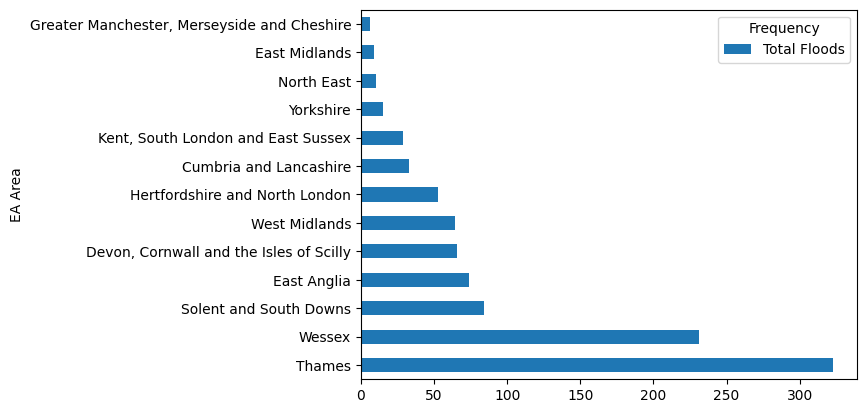

In [7]:
ea_df[['Total Floods']].plot.barh()

### Plot Severity

<Axes: ylabel='EA Area'>

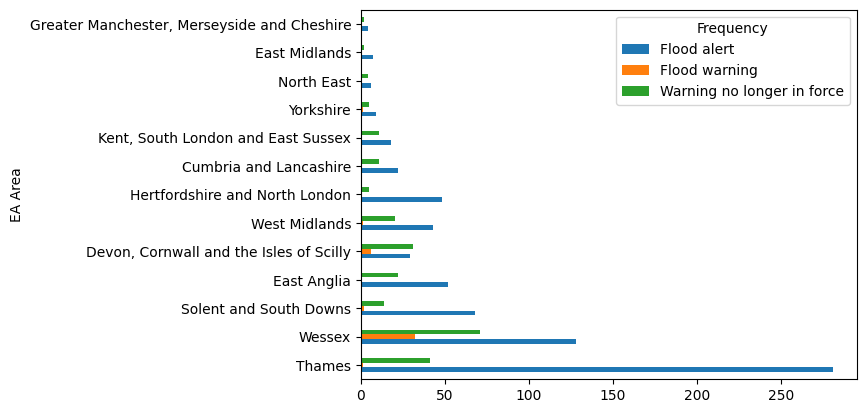

In [8]:
ea_df[['Flood alert', 'Flood warning', 'Warning no longer in force']].plot.barh()

### Plot Tidal Status

<Axes: ylabel='EA Area'>

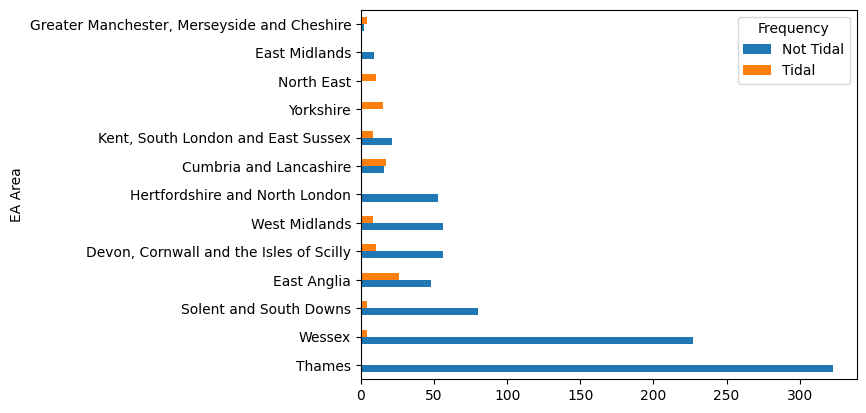

In [9]:
ea_df[['Not Tidal', 'Tidal']].plot.barh()

### Export Processed Data to CSV

In [13]:
ea_df.to_csv('data/flood_counts_data_03-09-2025.csv')

In [12]:
ea_df

Frequency,Total Floods,Flood alert,Flood warning,Warning no longer in force,Not Tidal,Tidal
EA Area,,,,,,
Thames,323,281,1,41,323,0
Wessex,231,128,32,71,227,4
Solent and South Downs,84,68,2,14,80,4
East Anglia,74,52,0,22,48,26
"Devon, Cornwall and the Isles of Scilly",66,29,6,31,56,10
West Midlands,64,43,1,20,56,8
Hertfordshire and North London,53,48,0,5,53,0
Cumbria and Lancashire,33,22,0,11,16,17
"Kent, South London and East Sussex",29,18,0,11,21,8
